In [1]:
#동적 생성되는 data 크롤링
#Selenium 모듈 사용
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
from selenium import webdriver


#### selenium 패키지 모듈 이용한 자동 크롤링
- webdriver라는 API를 통해 운영체제에 설치된 웹 브라우저를 제어하는 함수를 포함한 패키지
- 써드파티라이브러리이기 때문에 설치 해 줘야 함
- prompt 에서 설치
    - pip install selenium


#### 크롬 드라이버 다운로드
- https://chromedriver.chromium.org/downloads

#### 크롬 정보 확인
- 메뉴 - 도움말 - 크롬정보


In [2]:
#크롬 드라이버를 통한 네이버 접속
from selenium.webdriver.chrome.options import Options 
options = Options() 
# 노트북
options.binary_location= 'C:/Program Files/Google/Chrome/Application/chrome.exe' 

# 집
# options.binary_location= 'C:\Program Files (x86)\Google\Chrome\Application\chrome.exe' 

driver = webdriver.Chrome("./driver/chromedriver",chrome_options = options)
driver.get("https://news.naver.com")


<ipython-input-2-f9a58fb5123a>:10: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome("./driver/chromedriver",chrome_options = options)


In [5]:
# webdriver 객체 생성
driver =webdriver.Chrome('./driver/chromedriver')


In [6]:
# 페이지 접근
url ='https://nid.naver.com/nidlogin.login' 
driver.get(url)


In [7]:
# 화면 캡처
driver.save_screenshot('./crawl_data/sshot.png')

True

#### 셀레니움을 이용한 동적 크롤링 순서
1. webdriver 객체 생성
    - webdriver.브라우저명(웹드라이버경로/  path = )
    
2. get(url) 메서드 이용해서 사이트에 문서를 요청 후 응답 반환
3. 접근한 페이지 소스코드를 추출
    - driver.page_source
    
4. 소스코드를 파서기에 적용시켜서 추출
    

#### 동적 로그인 진행
- 프로그램코드를 통해서 자동 로그인되게 브라우저를 제어


In [39]:
# webdriver 객체 생성
driver =webdriver.Chrome('./driver/chromedriver')
# 페이지 접근
url ='https://nid.naver.com/nidlogin.login' 
driver.get(url)


In [40]:
# id 값을 전달
# 1. id를 입력할 element(input tag)를 찾아야 함 - input type='text' id='id'
id_elem = driver.find_element_by_id("id")
# 2. 미리 입력되어 있는 값이 있으면 지우기
id_elem.clear()
# 3. send_keys() 함수를 이용해서 element에 값을 전달
id_elem.send_keys('')

In [41]:
# password 값을 전달
# 1. password 입력할 element(input tag)를 찾아야 함 - input type='text' id='id'
pw_elem = driver.find_element_by_id("pw")
# 2. 미리 입력되어 있는 값이 있으면 지우기
pw_elem.clear()
# 3. send_keys() 함수를 이용해서 element에 값을 전달
pw_elem.send_keys('')

In [42]:
## 로그인 버튼 클릭
xpath = '//*[@id="log.login"]'
driver.find_element_by_xpath(xpath).click()
# 자동입력 방지 문자를 입력하는 기능이 나타남


In [74]:
## 자동입력 방지 문자를 우회하기 위해 브라우저 종료 후
## send_keys() 함수 대신에 id/pass 값을 input 박스에 직접 value 대입하는 스크립트  코드 작성 후 실행

id_input = ''
pw_input = ''
"document.getElementsByName('id')[0].value='" + id_input + "'"

"document.getElementsByName('id')[0].value=''"

In [60]:
driver = webdriver.Chrome('./driver/chromedriver')

url ='https://nid.naver.com/nidlogin.login' 
driver.get(url)


### webdriver 통해 script 코드 직접 실행
- driver.execute_script() 함수 - driver로 script 코드를 직접 실행


In [61]:
# id input tag의 value 값으로 id_input 변수 저장 값 대입 코드 실행

driver.execute_script("document.getElementsByName('id')[0].value='" + id_input + "'")
driver.execute_script("document.getElementsByName('pw')[0].value='" + pw_input + "'")


In [62]:
## 로그인 버튼 클릭
xpath = '//*[@id="log.login"]'
driver.find_element_by_xpath(xpath).click()


In [63]:
## 메일 페이지로 접근
driver.get("http://mail.naver.com")

In [66]:
# 코드 추출
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

<html lang="ko"><head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/css/mail2_le.min.210729.css" rel="stylesheet" type="text/css"/>
<link href="/css/mail_skin.min.210729.css" rel="stylesheet" type="text/css"/>
<link href="//ssl.pstatic.net" rel="dns-prefetch"/>
<link href="//lcs.naver.com" rel="dns-prefetch"/>
<link href="//cc.naver.com" rel="dns-prefetch"/>
<link href="//static.nid.naver.com" rel="dns-prefetch"/>
<link href="//phinf.pstatic.net" rel="dns-prefetch"/>
<link href="/css/mail_me.min.210729.css" rel="stylesheet" type="text/css"/>
<link href="/favicon.ico?2" rel="shortcut icon"/>
<title>받은메일함(20805) : 네이버 메일</title>
<script type="text/javascript">
		
		
		
		var gnb_service = "mail";
		var gnb_logout = "http://www.naver.com";
		var gnb_template = "gnb_utf8";
		var gnb_brightness = 3;
		var gnb_item_hide_option = 8;
		var gnb_one_naver = 1;
		
		
	</script>
<style type="text/css">
			.
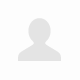
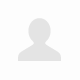
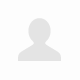
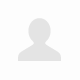

In [67]:
soup

### 메일 보낸이를 표현하는 div tag
 -`<div class="name _ccr(lst.from) ">` <b> `<span class="blind">보낸 이:</span>` </b> `<a title="&quot;네이버&quot; <webmaster@naver.com>" class="_c1(myContextMenu|showSenderContextLayer|list|2) _stopDefault" href="#">네이버</a></div>`


In [69]:
raw_list = soup.find_all('div',{'class':"name _ccr(lst.from)"})
raw_list


[<div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|34011) _stopDefault" href="#" title='"우체국쇼핑" &lt;info@posa.or.kr&gt;'>우체국쇼핑</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|34009) _stopDefault" href="#" title='"PAYCO" &lt;no-reply@payco.com&gt;'>PAYCO</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|34008) _stopDefault" href="#" title='"Twitch" &lt;no-reply@twitch.tv&gt;'>Twitch</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|34007) _stopDefault" href="#" title='"행복쇼핑" &lt;event@pping.kr&gt;'>행복쇼핑</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|34005) _stopDefault" href="#" title='

In [73]:
send_list = [raw_list[n].find('a').get_text() for n in range(0, len(raw_list))]
send_list

['우체국쇼핑',
 'PAYCO',
 'Twitch',
 '행복쇼핑',
 'Twitch',
 'KT',
 'Myprotein',
 'Twitch',
 'PAYCO',
 'PAYCO',
 '공취사│공기업,공..',
 'Myprotein',
 'Twitch',
 '공취사│공기업,공..',
 'Myprotein']